In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [5]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [ ]:
X = df.select_dtypes(include=[np.number])
X

# ESTANDARIZAMOS LOS DATOS

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


# APLICANDO KMEANS

In [13]:
k = 3

In [ ]:
kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
labels

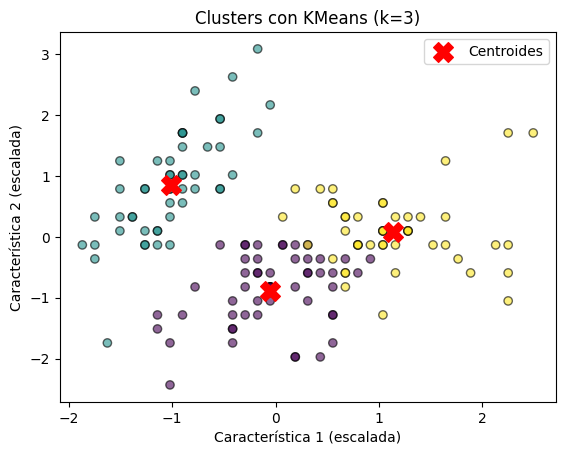

In [16]:
# Visualización de clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Característica 1 (escalada)')
plt.ylabel('Característica 2 (escalada)')
plt.title(f'Clusters con KMeans (k={k})')
plt.legend()
plt.show()

# EVALUAMOS EL MODELO

In [17]:
silhouette_value = silhouette_score(X_scaled,labels)
print(f'Coeficiente de Silueta para k={k} : {silhouette_value}:.4f')

Coeficiente de Silueta para k=3 : 0.45994823920518646:.4f


# Parámetros de K-Means en Scikit-Learn

## 1. Número de Clusters (`n_clusters`)
Define cuántos grupos quieres encontrar en los datos.  
Puede mejorarse probando diferentes valores de *k* y evaluando métricas como el **coeficiente de silueta** o la **inercia (SSE)**.  
Usa el **método del codo** o la **silueta media** para encontrar un buen valor.  



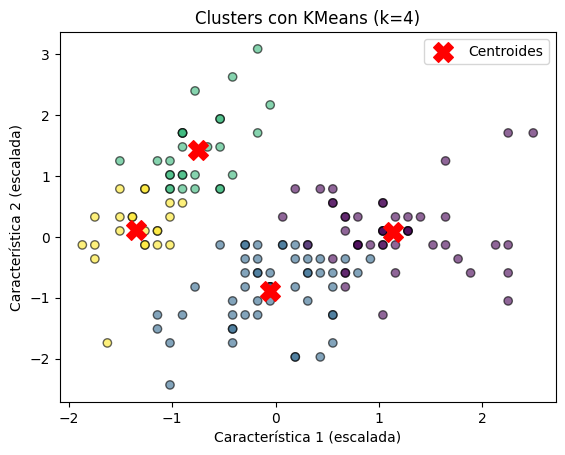

Coeficiente de Silueta para k=4 : 0.38694104154427816:.4f


In [18]:
k = 4
kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Característica 1 (escalada)')
plt.ylabel('Característica 2 (escalada)')
plt.title(f'Clusters con KMeans (k={k})')
plt.legend()
plt.show()
silhouette_value = silhouette_score(X_scaled,labels)
print(f'Coeficiente de Silueta para k={k} : {silhouette_value}:.4f')

## 2. Inicialización de Centroides (`init`)
Controla cómo se seleccionan los centroides iniciales. Opciones:
- `"k-means++"` (recomendado, inicialización más inteligente).
- `"random"` (selección aleatoria).
- Un array con posiciones específicas.


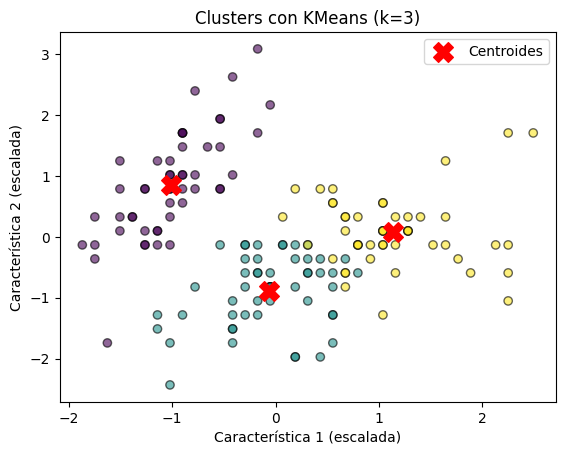

Coeficiente de Silueta para k=3 : 0.45937792074496625:.4f


In [20]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=42,n_init=10,init='random')
kmeans.fit(X_scaled)
labels = kmeans.labels_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Característica 1 (escalada)')
plt.ylabel('Característica 2 (escalada)')
plt.title(f'Clusters con KMeans (k={k})')
plt.legend()
plt.show()
silhouette_value = silhouette_score(X_scaled,labels)
print(f'Coeficiente de Silueta para k={k} : {silhouette_value}:.4f')

## 3. Número de Inicializaciones (`n_init`)
Número de veces que se ejecuta el algoritmo con diferentes centroides iniciales.  
- `n_init=10` era el valor predeterminado en versiones antiguas de **scikit-learn**, pero en **scikit-learn 1.4+** se establece automáticamente en `"auto"`.  
- Un valor más alto mejora la estabilidad del resultado.  


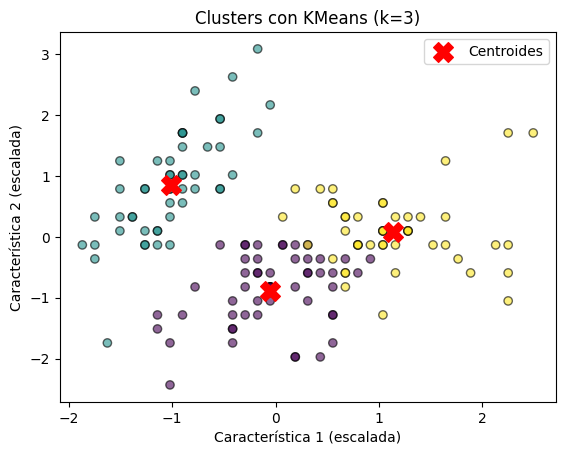

Coeficiente de Silueta para k=3 : 0.45994823920518646:.4f


In [21]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=42,n_init=20)
kmeans.fit(X_scaled)
labels = kmeans.labels_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Característica 1 (escalada)')
plt.ylabel('Característica 2 (escalada)')
plt.title(f'Clusters con KMeans (k={k})')
plt.legend()
plt.show()
silhouette_value = silhouette_score(X_scaled,labels)
print(f'Coeficiente de Silueta para k={k} : {silhouette_value}:.4f')


## 4. Número Máximo de Iteraciones (`max_iter`)
Determina cuántas iteraciones puede hacer el algoritmo hasta converger.  
- Por defecto es **300**, pero si el modelo no está convergiendo, puedes aumentarlo.  


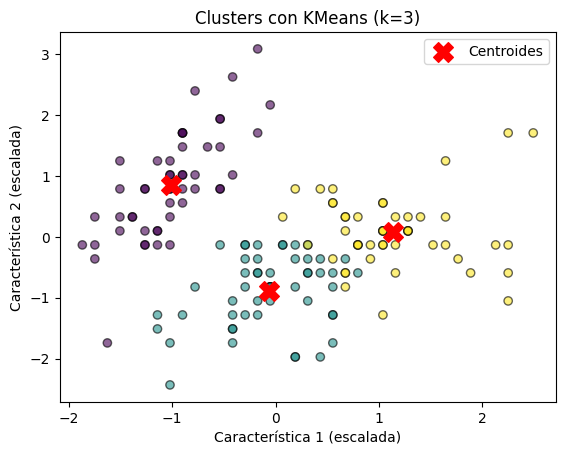

Coeficiente de Silueta para k=3 : 0.45937792074496625:.4f


In [22]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=42,n_init=10,init='random',max_iter=500)
kmeans.fit(X_scaled)
labels = kmeans.labels_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Característica 1 (escalada)')
plt.ylabel('Característica 2 (escalada)')
plt.title(f'Clusters con KMeans (k={k})')
plt.legend()
plt.show()
silhouette_value = silhouette_score(X_scaled,labels)
print(f'Coeficiente de Silueta para k={k} : {silhouette_value}:.4f')

## 5. Tolerancia (`tol`)
Define el umbral de cambio en la inercia para detener el algoritmo.  
- Si los centroides no cambian más allá de este umbral, el algoritmo se detiene antes de llegar a `max_iter`.  
- Reducirlo puede hacer que el algoritmo sea más preciso pero más lento.  

- **Por defecto**: `1e-4` (0.0001) en scikit-learn. Funciona bien en la mayoría de los casos.
- **Más estricto (mayor precisión)**: `1e-5` o `1e-6`.  
  - Puede ayudar a encontrar una mejor convergencia, pero aumenta el tiempo de ejecución.
- **Más relajado (convergencia más rápida)**: `1e-3` o `1e-2`.  
  - Útil si los datos son ruidosos o si se quiere una solución rápida sin esperar muchas iteraciones.


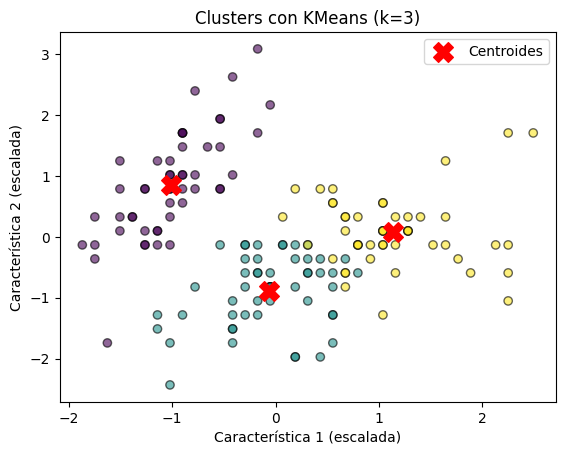

Coeficiente de Silueta para k=3 : 0.45937792074496625:.4f


In [23]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=42,n_init=10,init='random',tol=1e-3)
kmeans.fit(X_scaled)
labels = kmeans.labels_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Característica 1 (escalada)')
plt.ylabel('Característica 2 (escalada)')
plt.title(f'Clusters con KMeans (k={k})')
plt.legend()
plt.show()
silhouette_value = silhouette_score(X_scaled,labels)
print(f'Coeficiente de Silueta para k={k} : {silhouette_value}:.4f')

## 6. Método de Asignación de Etiquetas (`algorithm`)
Opciones:
- `"lloyd"` (el método clásico, recomendado para la mayoría de los casos).
- `"elkan"` (usa un enfoque más eficiente, pero no funciona bien con datos dispersos).
- `"auto"` (elige automáticamente el mejor método según los datos).


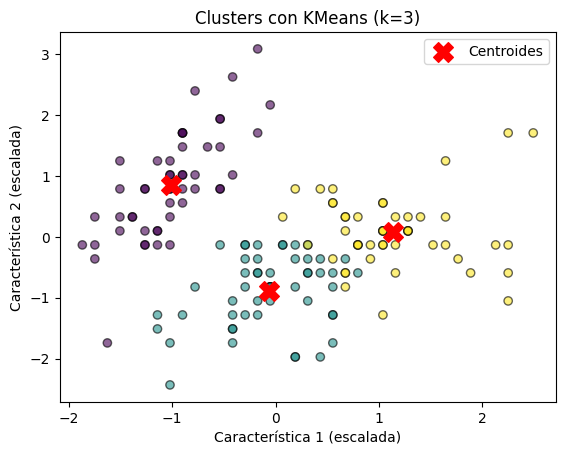

Coeficiente de Silueta para k=3 : 0.45937792074496625:.4f


In [24]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=42,n_init=10,init='random',algorithm='elkan')
kmeans.fit(X_scaled)
labels = kmeans.labels_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Característica 1 (escalada)')
plt.ylabel('Característica 2 (escalada)')
plt.title(f'Clusters con KMeans (k={k})')
plt.legend()
plt.show()
silhouette_value = silhouette_score(X_scaled,labels)
print(f'Coeficiente de Silueta para k={k} : {silhouette_value}:.4f')


## 7. Aleatoriedad (`random_state`)
Fijar un número en `random_state` garantiza resultados reproducibles.

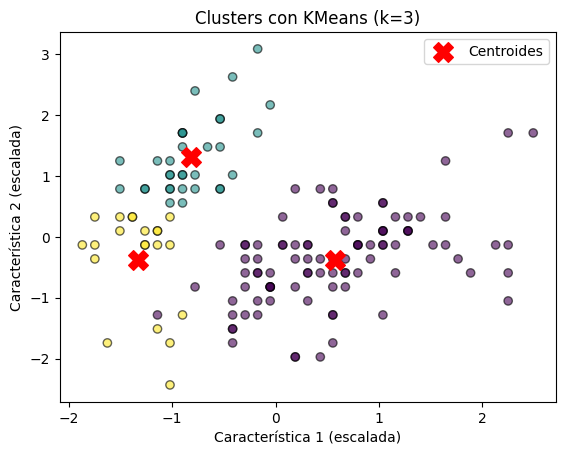

Coeficiente de Silueta para k=3 : 0.4798814508199818:.4f


In [25]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Característica 1 (escalada)')
plt.ylabel('Característica 2 (escalada)')
plt.title(f'Clusters con KMeans (k={k})')
plt.legend()
plt.show()
silhouette_value = silhouette_score(X_scaled,labels)
print(f'Coeficiente de Silueta para k={k} : {silhouette_value}:.4f')

n_clusters=2, init=k-means++, max_iter=300, tol=0.0001, n_init=10, algorithm=lloyd -> Silhouette: 0.5818
n_clusters=2, init=k-means++, max_iter=300, tol=0.0001, n_init=10, algorithm=elkan -> Silhouette: 0.5818
n_clusters=2, init=k-means++, max_iter=300, tol=0.0001, n_init=15, algorithm=lloyd -> Silhouette: 0.5818
n_clusters=2, init=k-means++, max_iter=300, tol=0.0001, n_init=15, algorithm=elkan -> Silhouette: 0.5818
n_clusters=2, init=k-means++, max_iter=300, tol=1e-05, n_init=10, algorithm=lloyd -> Silhouette: 0.5818
n_clusters=2, init=k-means++, max_iter=300, tol=1e-05, n_init=10, algorithm=elkan -> Silhouette: 0.5818
n_clusters=2, init=k-means++, max_iter=300, tol=1e-05, n_init=15, algorithm=lloyd -> Silhouette: 0.5818
n_clusters=2, init=k-means++, max_iter=300, tol=1e-05, n_init=15, algorithm=elkan -> Silhouette: 0.5818
n_clusters=2, init=k-means++, max_iter=300, tol=0.001, n_init=10, algorithm=lloyd -> Silhouette: 0.5818
n_clusters=2, init=k-means++, max_iter=300, tol=0.001, n_ini

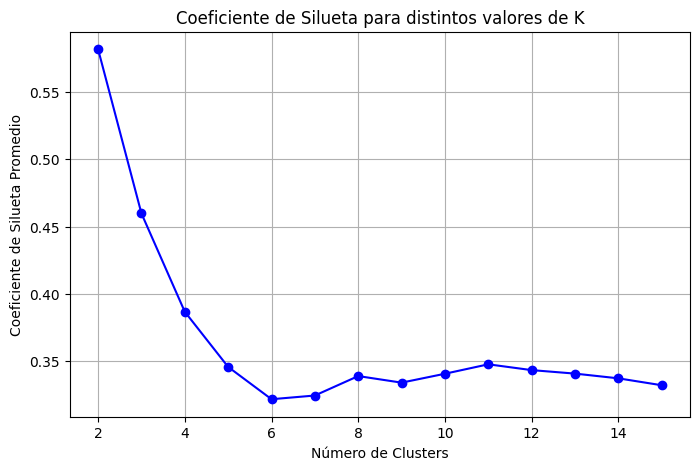

In [31]:
import itertools
# Valores a probar
n_clusters_options = range(2, 16)
init_options = ['k-means++', 'random']
max_iter_options = [300, 500]
tol_options = [1e-4, 1e-5, 1e-3]
n_init_options = [10, 15]
algorithm_options = ['lloyd', 'elkan']

# Todas las combinaciones posibles de parámetros
param_combinations = list(itertools.product(n_clusters_options, init_options, max_iter_options, tol_options, n_init_options, algorithm_options))

best_silhouette = -1
best_params = None
silhouette_scores = {}

# Probar todas las combinaciones
for n_clusters, init, max_iter, tol, n_init, algorithm in param_combinations:
    try:
        kmeans = KMeans(
            n_clusters=n_clusters,
            init=init,
            max_iter=max_iter,
            tol=tol,
            n_init=n_init,
            algorithm=algorithm,
            random_state=42
        )
        kmeans.fit(X_scaled)
        labels = kmeans.labels_
        silhouette = silhouette_score(X_scaled, labels)

        if n_clusters not in silhouette_scores:
            silhouette_scores[n_clusters] = []
        silhouette_scores[n_clusters].append(silhouette)

        print(f'n_clusters={n_clusters}, init={init}, max_iter={max_iter}, tol={tol}, n_init={n_init}, algorithm={algorithm} -> Silhouette: {silhouette:.4f}')

        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_params = (n_clusters, init, max_iter, tol, n_init, algorithm)
    except Exception as e:
        print(f'Error con parámetros n_clusters={n_clusters}, init={init}, max_iter={max_iter}, tol={tol}, n_init={n_init}, algorithm={algorithm}: {e}')

# Mostrar mejor combinación
print("\nMejores parámetros encontrados:")
print(f'n_clusters={best_params[0]}, init={best_params[1]}, max_iter={best_params[2]}, tol={best_params[3]}, n_init={best_params[4]}, algorithm={best_params[5]} -> Mejor Silhouette: {best_silhouette:.4f}')

# Graficar coeficiente de silueta
avg_silhouette_scores = {k: np.mean(v) for k, v in silhouette_scores.items()}
n_clusters_list = sorted(avg_silhouette_scores.keys())
silhouette_values = [avg_silhouette_scores[k] for k in n_clusters_list]

plt.figure(figsize=(8, 5))
plt.plot(n_clusters_list, silhouette_values, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta Promedio')
plt.title('Coeficiente de Silueta para distintos valores de K')
plt.grid()
plt.show()
